# Breast Cancer Detection using Logistic Regression

## Packages used

In [1]:
import pandas as pd
import turicreate 
import matplotlib.pyplot as plt
import turicreate_cross_validation.cross_validation as tcv
import numpy as np

%matplotlib inline

## Loading Data

Dataset has been taken from Kaggle provided by University of Wisconsin.

In [2]:
from turicreate import SFrame

In [3]:
data=turicreate.SFrame('data_cancer1.csv')

Finished parsing file /mnt/c/Users/RAJARSHI MAITY/Documents/Python/Breast Cancer/data_cancer1.csv

Parsing completed. Parsed 100 lines in 0.063193 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/c/Users/RAJARSHI MAITY/Documents/Python/Breast Cancer/data_cancer1.csv

Parsing completed. Parsed 569 lines in 0.063786 secs.

In [5]:
data

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864
84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599
84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839
84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328
843786,M,12.45,15.7,82.57,477.1,0.1278,0.17
844359,M,18.25,19.98,119.6,1040.0,0.09463,0.109
84458202,M,13.71,20.83,90.2,577.9,0.1189,0.1645
844981,M,13.0,21.82,87.5,519.8,0.1273,0.1932
84501001,M,12.46,24.04,83.97,475.9,0.1186,0.2396


In [6]:
data=data.remove_columns(['m','n'])

In [7]:
print(data.column_names() )#as we can see there are 32 columns

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


# Model Using Logistic Classifiers

In [8]:
data['diagnosis']=data['diagnosis'].apply(lambda x: 1 if x== 'M' else -1)
data #Converting the diagonosis column and replacing data with +1 and -1

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
842302,1,17.99,10.38,122.8,1001.0,0.1184,0.2776
842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864
84300903,1,19.69,21.25,130.0,1203.0,0.1096,0.1599
84348301,1,11.42,20.38,77.58,386.1,0.1425,0.2839
84358402,1,20.29,14.34,135.1,1297.0,0.1003,0.1328
843786,1,12.45,15.7,82.57,477.1,0.1278,0.17
844359,1,18.25,19.98,119.6,1040.0,0.09463,0.109
84458202,1,13.71,20.83,90.2,577.9,0.1189,0.1645
844981,1,13.0,21.82,87.5,519.8,0.1273,0.1932
84501001,1,12.46,24.04,83.97,475.9,0.1186,0.2396


In [9]:
train_validation_data,test_data=data.random_split(0.8,seed=0)
train_data,validation_data=train_validation_data.random_split(0.9,seed=0)

In [10]:
main_features=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [11]:
model_1=turicreate.logistic_classifier.create(train_data,target='diagnosis',features=main_features,validation_set=validation_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 406

Number of classes           : 2

Number of feature columns   : 30

Number of unpacked features : 30

Number of coefficients      : 31

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 1.021164     | 0.963054          | 0.906977            |

| 2         | 3        | 1.036044     | 0.970443          | 0.906977            |

| 3         | 4        | 1.046669     | 0.975369          | 0.906977            |

| 4         | 5        | 1.051170     | 0.982759          | 0.930233            |

| 5         | 6        | 1.057418     | 0.985222          | 0.930233            |

| 8         | 9        | 1.081447     | 0.987685          | 0.953488            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [12]:
model_1.coefficients

name,index,class,value,stderr
(intercept),None,1,-31.6911758157153,42.93320461936823
radius_mean,None,1,-0.11346735973719733,13.121339059753677
texture_mean,None,1,0.10288431310358807,0.4186159713201819
perimeter_mean,None,1,-0.02185868454121524,1.966030079274633
area_mean,None,1,-0.001815024866427547,0.06505025520578092
smoothness_mean,None,1,5.7453018057451315,172.9487155950124
compactness_mean,None,1,-47.045374057127646,93.79590203837208
concavity_mean,None,1,20.686404376476855,78.76456287985461
concave points_mean,None,1,102.33820677465498,137.35314485674633
symmetry_mean,None,1,-7.265475124466024,43.707455764196794


In [13]:
data['predicted_diagnosis']=model_1.predict(data,output_type='probability')

In [14]:
data.tail()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
925291,-1,11.51,23.93,74.52,403.5,0.09261,0.1021
925292,-1,14.05,27.15,91.38,600.4,0.09929,0.1126
925311,-1,11.2,29.37,70.67,386.0,0.07449,0.03558
925622,1,15.22,30.62,103.4,716.9,0.1048,0.2087
926125,1,20.92,25.09,143.0,1347.0,0.1099,0.2236
926424,1,21.56,22.39,142.0,1479.0,0.111,0.1159
926682,1,20.13,28.25,131.2,1261.0,0.0978,0.1034
926954,1,16.6,28.08,108.3,858.1,0.08455,0.1023
927241,1,20.6,29.33,140.1,1265.0,0.1178,0.277
92751,-1,7.76,24.54,47.92,181.0,0.05263,0.04362


In [15]:
model_1.evaluate(test_data)

{'accuracy': 0.9916666666666667,
 'auc': 0.9999999999999986,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 3
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      -1      |        1        |   1   |
 |      -1      |        -1       |   78  |
 |      1       |        1        |   41  |
 +--------------+-----------------+-------+
 [3 rows x 3 columns],
 'f1_score': 0.9879518072289156,
 'log_loss': 0.029065882466371193,
 'precision': 0.9761904761904762,
 'recall': 1.0,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+-----+----+----+
 | threshold |        fpr         | tpr | p  | n  |
 +-----------+--------------------+-----+----+----+
 |    0.0    |        1.0         | 1.0 | 41 | 79 |
 |   1e-05   | 0.6835443037974683 | 1.0 | 41 | 79 |
 |   2e-05   | 0.6708

In [16]:
predictions = model_1.predict(train_data)
sentiment= train_data['diagnosis']
num_correct = (predictions == sentiment).sum()
accuracy = num_correct / len(train_data)    
print(accuracy)

0.9876847290640394


## Conclusion:
Looking at the variation of the coefficients it can be assumed that the model is an overfit one. Weights of some of the features are as high 102.(eg: see the weight of concave points_mean	).This accounts for the perfect accuracy of the model on training_data.Hemce,this overfit model is not preferable.

Also the validation set taken into account is a very small subset of the data.Since, the data set is extremely small k-fold cross validation is applied later.

# Logistic Regression with L2 regularization

## Selecting L2 penalty via cross validation
We will implement a kind of cross-validation called k-fold cross-validation. This method involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
...
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. 
To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. Turi Create has a utility function for shuffling a given SFrame. We reserve 20% of the data as the test set and shuffle the remainder. ( seed=1 is fixed to get consistent answer.)

In [17]:
(train_valid, test) = data.random_split(.8, seed=0)
train_valid_shuffled = tcv.shuffle_sframe(train_valid, random_seed=0)
train_valid_shuffled[0:10]

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
8912909,-1,11.94,20.76,77.87,441.0,0.08605,0.1011
874158,-1,10.08,15.11,63.76,317.5,0.09267,0.04695
901836,-1,11.04,14.93,70.67,372.7,0.07987,0.07079
906290,-1,11.16,21.41,70.95,380.3,0.1018,0.05978
875938,1,13.77,22.29,90.63,588.9,0.12,0.1267
924964,-1,10.16,19.59,64.73,311.7,0.1003,0.07504
852781,1,18.61,20.25,122.1,1094.0,0.0944,0.1066
8712853,-1,14.97,16.95,96.22,685.9,0.09855,0.07885
91550,-1,11.74,14.69,76.31,426.0,0.08099,0.09661
911916,1,16.25,19.51,109.8,815.8,0.1026,0.1893


In [18]:
print (len(train_valid_shuffled))

449


# Exploring different L2 penalties


In [19]:
table = turicreate.SFrame({'word': ['(intercept)'] + main_features})
def add_coefficients_to_table(coefficients, column_name):
    table[column_name] = coefficients
    return table

In [20]:
L2_penalties=[0,0.05,0.2,1e2,1e5]

In [21]:
model_2_1=turicreate.logistic_classifier.create(train_data, target = 'diagnosis', features = main_features, 
                                                  l2_penalty=0,
                                                verbose=False)

coefficients_0_penalty=model_2_1.coefficients['value']

model_2_2=turicreate.logistic_classifier.create(train_data, target = 'diagnosis', features = main_features, 
                                                  l2_penalty=0.05,
                                                  verbose=False)

coefficients_05_penalty=model_2_2.coefficients['value']

model_2_3=turicreate.logistic_classifier.create(train_data, target = 'diagnosis', features = main_features, 
                                                  l2_penalty=0.2,
                                                  verbose=False)

coefficients_2_penalty=model_2_3.coefficients['value']


model_2_4=turicreate.logistic_classifier.create(train_data, target = 'diagnosis', features = main_features, 
                                                  l2_penalty=1e2,
                                                verbose=False)

coefficients_1e2_penalty=model_2_4.coefficients['value']

model_2_5=turicreate.logistic_classifier.create(train_data, target = 'diagnosis', features = main_features, 
                                                  l2_penalty=1e5,
                                                verbose=False)

coefficients_1e5_penalty=model_2_5.coefficients['value']


## Compare coefficients

We now compare the **coefficients** for each of the models that were trained above. We will create a table of features and learned coefficients associated with each of the different L2 penalty values.

Below is a simple helper function that will help us create this table.

In [22]:
add_coefficients_to_table(coefficients_0_penalty, 'coefficients [L2=0]')
add_coefficients_to_table(coefficients_05_penalty, 'coefficients [L2=0.05]')
add_coefficients_to_table(coefficients_2_penalty, 'coefficients [L2=0.2]')
add_coefficients_to_table(coefficients_1e2_penalty, 'coefficients [L2=1e2]')
add_coefficients_to_table(coefficients_1e5_penalty, 'coefficients [L2=1e5]')

word,coefficients [L2=0],coefficients [L2=0.05],coefficients [L2=0.2],coefficients [L2=1e2]
(intercept),-572.3370247070956,-23.733976047521793,-18.71349755821822,-2.7042459537034462
radius_mean,-83.12390522192062,0.004739383311588278,0.041700151685071116,0.005545776345324201
texture_mean,5.641271288449989,0.09304167323916468,0.08023506055985209,0.002240430650718715
perimeter_mean,5.445202228292777,-0.0006831636368609995,0.006056650486030117,0.0009003818364216291
area_mean,0.3128629906196337,0.0006711031887780584,0.001561341303320159,0.00020808374517945584
smoothness_mean,-812.8541955963344,4.962760450017355,1.9529122747322076,0.24934029475085492
compactness_mean,-2001.1266172586859,-15.60242713528534,-3.3166588283992247,0.8841170483389353
concavity_mean,254.81971631241174,14.792292109517382,12.386875676608064,1.6229561972437854
concave points_mean,2426.1654777368003,48.946648689526135,27.4537556205034,3.495630564704219
symmetry_mean,37.449766449348914,-1.169119563773952,0.5480093311709632,0.11784190124805313


In [23]:
positive_words=table.sort('coefficients [L2=0]',ascending=False)[0:4]['word']
negative_words=table.sort('coefficients [L2=0]',ascending=True)[0:4]['word']
positive_words,negative_words

(dtype: str
 Rows: 4
 ['concave points_se', 'fractal_dimension_mean', 'concave points_mean', 'smoothness_worst'],
 dtype: str
 Rows: 4
 ['fractal_dimension_se', 'smoothness_se', 'compactness_mean', 'smoothness_mean'])

## Visualizing coefficients

In [24]:
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table.filter_by(column_name='word', values=positive_words)
    table_negative_words = table.filter_by(column_name='word', values=negative_words)
    del table_positive_words['word']
    del table_negative_words['word']
    
    for i in range(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[i:i+1].to_numpy().flatten(),
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i in range(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[i:i+1].to_numpy().flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':10}, columnspacing=0.5)
    plt.axis([1, 1e5, -100, 50])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()

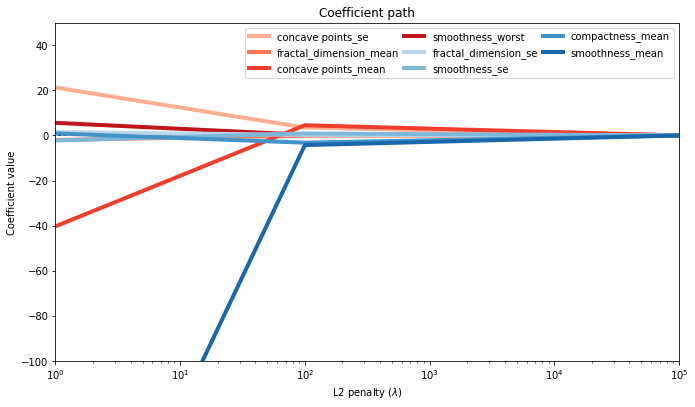

In [25]:
make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list=[0, 0.05, 0.2, 1e2, 1e5])

## Function for k-fold cross validation

In [4]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):    
    n = len(data)
    f=[]
    for i in range(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        validation_set = data[start:end+1]
        training_set = data[0:start].append(data[end+1:n])    
        model = turicreate.logistic_classifier.create(training_set, target = output_name, features = features_list, 
                                                  l2_penalty=l2_penalty,
                                                  validation_set=None,verbose=False)
        predictions = model.predict(validation_set)
        diagnosis= validation_set['diagnosis']
        num_correct = (predictions == diagnosis).sum()
        f.append(num_correct)
    accuracy_valid = sum(f) / len(train_valid_shuffled) 
    return accuracy_valid

   From the results above e can easily determine the value of L2_penalty i.e 0.2 in our case.
   It provides a good validation accuracy and reduces the magnitude of the coeffetients.
   Thus reducing the problem of over-fitting.

## Visualizing training and validation error using different L2_penalties

In [27]:
train_accuracy = {}
train_accuracy[0]   = model_2_1.evaluate(train_data)['accuracy']
train_accuracy[0.05] = model_2_2.evaluate(train_data)['accuracy']
train_accuracy[0.2]  = model_2_3.evaluate(train_data)['accuracy']
train_accuracy[1e2] = model_2_4.evaluate(train_data)['accuracy']
train_accuracy[1e5] = model_2_5.evaluate(train_data)['accuracy']
validation_accuracy = {}
validation_accuracy[0]   =k_fold_cross_validation(10,0, train_valid_shuffled, 'diagnosis', main_features)
validation_accuracy[0.05]   =k_fold_cross_validation(10,0.05, train_valid_shuffled, 'diagnosis', main_features)
validation_accuracy[0.2]  = k_fold_cross_validation(10,0.2, train_valid_shuffled, 'diagnosis', main_features)
validation_accuracy[1e2] = k_fold_cross_validation(10,1e2, train_valid_shuffled, 'diagnosis', main_features)
validation_accuracy[1e5] = k_fold_cross_validation(10,1e5, train_valid_shuffled, 'diagnosis', main_features)

In [28]:
# a simple report
for key in sorted(validation_accuracy.keys()):
    print("L2 penalty = %g" % key)
    print("train accuracy = %s, validation_accuracy = %s" % (train_accuracy[key], validation_accuracy[key]))
    print("--------------------------------------------------------------------------------")

L2 penalty = 0
train accuracy = 0.9950738916256158, validation_accuracy = 0.9354120267260579
--------------------------------------------------------------------------------
L2 penalty = 0.05
train accuracy = 0.9827586206896551, validation_accuracy = 0.9732739420935412
--------------------------------------------------------------------------------
L2 penalty = 0.2
train accuracy = 0.9876847290640394, validation_accuracy = 0.9732739420935412
--------------------------------------------------------------------------------
L2 penalty = 100
train accuracy = 0.8866995073891626, validation_accuracy = 0.888641425389755
--------------------------------------------------------------------------------
L2 penalty = 100000
train accuracy = 0.6305418719211823, validation_accuracy = 0.6191536748329621
--------------------------------------------------------------------------------


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

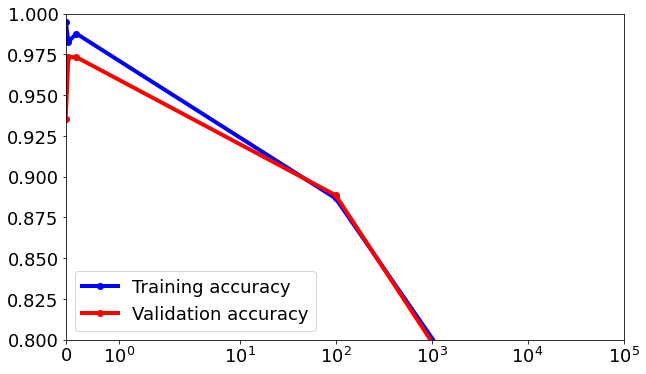

In [29]:
# Ploting accuracy on training and validation sets over choice of L2 penalty.
plt.rcParams['figure.figsize'] = 10, 6

sorted_list = sorted(train_accuracy.items(), key=lambda x:x[0])
plt.plot([p[0] for p in sorted_list], [p[1] for p in sorted_list], 'bo-', linewidth=4, label='Training accuracy')
sorted_list = sorted(validation_accuracy.items(), key=lambda x:x[0])
plt.plot([p[0] for p in sorted_list], [p[1] for p in sorted_list], 'ro-', linewidth=4, label='Validation accuracy')
plt.xscale('symlog')
plt.axis([0, 1e5, 0.80, 1.0])
plt.legend(loc='lower left')
plt.rcParams.update({'font.size': 18})
plt.tight_layout

In [30]:
 model_2_3.evaluate(test_data)

{'accuracy': 1.0,
 'auc': 0.9999999999999987,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 2
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      -1      |        -1       |   79  |
 |      1       |        1        |   41  |
 +--------------+-----------------+-------+
 [2 rows x 3 columns],
 'f1_score': 1.0,
 'log_loss': 0.05514956677249277,
 'precision': 1.0,
 'recall': 1.0,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+-----+----+----+
 | threshold |        fpr         | tpr | p  | n  |
 +-----------+--------------------+-----+----+----+
 |    0.0    |        1.0         | 1.0 | 41 | 79 |
 |   1e-05   | 0.9873417721518988 | 1.0 | 41 | 79 |
 |   2e-05   | 0.9620253164556962 | 1.0 | 41 | 79 |
 |   3e-05   | 0.9367088607594937 | 1.0 | 41 | 79 |
 |   4e

From the results above if can be concluded that the logistic regression model with L2_penalty =0.2 is the most efficient model.L1_penalty is kept zero because the number of features are pretty less,so the need for sparsity is not required. 

## Precision and Recall

$$
[\text{precision}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all data points with positive predictions]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false positives}]}
$$

In [31]:
precision = model_2_3.evaluate(test_data, metric='precision')['precision']
print ("Precision on test data: %s" % precision)

Precision on test data: 1.0


A complementary metric i.e **recall**, which measures the ratio between the number of true positives and that of (ground-truth) positive reviews:

$$
[\text{recall}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all positive data points]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false negatives}]}
$$

Let us compute the recall on the **test_data**.

In [32]:
recall = model_2_3.evaluate(test_data, metric='recall')['recall']
print("Recall on test data: %s" % recall)

Recall on test data: 1.0


## Precision-recall curve

Now, we will explore various different values of tresholds, compute the precision and recall scores, and then plot the precision-recall curve.

In [33]:
threshold_values = np.linspace(0, 1, num=1000)

In [34]:
def apply_threshold(probabilities, threshold):
    ans = turicreate.SArray([+1 if x >= threshold else -1 for x in probabilities])
    return ans        

In [35]:
precision_all = []
recall_all = []

probabilities = model_2_3.predict(test_data, output_type='probability')
for threshold in threshold_values:
    predictions = apply_threshold(probabilities, threshold)
    
    precision = turicreate.evaluation.precision(test_data['diagnosis'], predictions)
    recall = turicreate.evaluation.recall(test_data['diagnosis'], predictions)
    
    precision_all.append(precision)
    recall_all.append(recall)

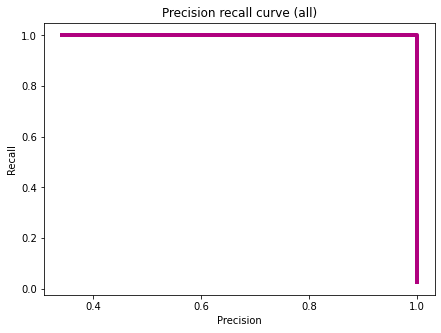

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(precision, recall, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})
    
plot_pr_curve(precision_all, recall_all, 'Precision recall curve (all)')